In [1]:
!curl -L "https://app.roboflow.com/ds/4ofcPozFdH?key=4ET3gKrb5m" > roboflow.zip
!unzip roboflow.zip 
!rm roboflow.zip

curl: /opt/conda/lib/libcurl.so.4: no version information available (required by curl)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   907  100   907    0     0   3480      0 --:--:-- --:--:-- --:--:--  3488
100 15.3M  100 15.3M    0     0  20.7M      0 --:--:-- --:--:-- --:--:-- 97.6M
Archive:  roboflow.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 20.2 MB/s eta 0:00:0000:01


In [3]:
from ultralytics import YOLO
model=YOLO("yolov8m-seg.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# # %load /kaggle/working/data.yaml
# train: train/images
# val: valid/images
# test: test/images

# names: 
#   0: Buildings

In [5]:
%%writefile /kaggle/working/data.yaml

train: ../train/images
val: ../valid/images

names: 
  0: Buildings

Overwriting /kaggle/working/data.yaml


In [6]:
import os
import random
import shutil
from pathlib import Path

# Paths
train_images_dir = "/kaggle/working/train/images"
train_labels_dir = "/kaggle/working/train/labels"
val_images_dir = "/kaggle/working/valid/images"
val_labels_dir = "/kaggle/working/valid/labels"

# Create validation folders if not exist
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# Get all image files from the train/images directory
image_files = [f for f in os.listdir(train_images_dir) if os.path.isfile(os.path.join(train_images_dir, f))]
random.shuffle(image_files)  # Shuffle for unbiased splitting

# Split data: 80% train, 20% val
split_idx = int(0.8 * len(image_files))
val_images = image_files[split_idx:]  # Validation images (last 20%)

# Move images and corresponding labels to validation folder
for img in val_images:
    # Move the image
    src_image_path = os.path.join(train_images_dir, img)
    dest_image_path = os.path.join(val_images_dir, img)
    shutil.move(src_image_path, dest_image_path)

    # Move the corresponding label (if exists)
    label_file = Path(train_labels_dir) / (Path(img).stem + ".txt")
    if label_file.exists():
        dest_label_path = os.path.join(val_labels_dir, label_file.name)
        shutil.move(label_file, dest_label_path)

print("Dataset splitting into train/valid directories is complete!")


Dataset splitting into train/valid directories is complete!


In [7]:
result=model.train(
    data= "/kaggle/working/data.yaml",
    project= "output_model",
    name="epoc",
    epochs=75,
    batch=8,
    imgsz=512,
    
)

Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/kaggle/working/data.yaml, epochs=75, time=None, patience=100, batch=8, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=output_model, name=epoc3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 20.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /kaggle/working/train/labels... 89 images, 0 backgrounds, 2 corrupt: 100%|██████████| 89/89 [00:00<00:00, 930.52it/s]

train: WARNING ⚠️ /kaggle/working/train/images/12_png.rf.e461aee0ccff8b768883f61293f84857.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0419]
train: WARNING ⚠️ /kaggle/working/train/images/2_png.rf.7e079bf4d16f210786ae65c1521ccc6e.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0046]
train: New cache created: /kaggle/working/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/valid/labels... 97 images, 1 backgrounds, 1 corrupt: 100%|██████████| 97/97 [00:00<00:00, 532.41it/s]

val: WARNING ⚠️ /kaggle/working/valid/images/2_png.rf.c8e0548963effd3aefab47fb5c40f974.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0407]


val: New cache created: /kaggle/working/valid/labels.cache
Plotting labels to output_model/epoc3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to output_model/epoc3
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/75       4.5G      1.755      4.369      2.575      1.727        137        512: 100%|██████████| 11/11 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.65it/s]

                   all         96        882      0.363       0.59      0.352      0.222      0.357      0.553      0.333      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/75       4.2G       1.03      1.914      1.243       1.22        100        512: 100%|██████████| 11/11 [00:04<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.84it/s]

                   all         96        882      0.858      0.587        0.7      0.501      0.861       0.59      0.691      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/75      4.01G      1.028      1.887      1.141      1.205        123        512: 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]

                   all         96        882      0.777      0.667      0.665      0.429      0.778      0.668      0.659      0.426



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/75      4.24G     0.9832      1.652      0.946      1.169        134        512: 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all         96        882      0.811      0.306      0.395      0.223      0.748      0.282      0.316      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/75      4.13G      1.009      1.878      1.008      1.238        100        512: 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all         96        882     0.0975      0.108     0.0303     0.0129     0.0908     0.0488     0.0145     0.0089



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/75      4.31G      1.041      1.798      1.048      1.237         94        512: 100%|██████████| 11/11 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all         96        882     0.0198      0.221    0.00887    0.00276    0.00805     0.0828    0.00246    0.00075



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/75      4.32G      1.024      1.777      1.077      1.249        153        512: 100%|██████████| 11/11 [00:04<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all         96        882     0.0141      0.458     0.0104    0.00326   0.000903     0.0295   0.000465   0.000119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/75      4.31G      1.123      1.673      1.023      1.249        124        512: 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all         96        882     0.0141        0.4     0.0101    0.00349    0.00721      0.204    0.00434    0.00136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/75      4.18G      1.162      1.782     0.9517      1.236        154        512: 100%|██████████| 11/11 [00:04<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all         96        882     0.0319      0.382     0.0214    0.00771     0.0133      0.183    0.00627     0.0031



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/75       4.2G      1.127      1.754      1.006      1.274        102        512: 100%|██████████| 11/11 [00:04<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all         96        882      0.128       0.24     0.0578     0.0284      0.112       0.21     0.0388     0.0221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/75      4.22G       1.07      1.718      0.959       1.23        123        512: 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all         96        882      0.203      0.304      0.109     0.0627      0.201       0.29     0.0926     0.0553



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/75      4.25G     0.9635      1.502     0.9183      1.193        119        512: 100%|██████████| 11/11 [00:04<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.69it/s]

                   all         96        882      0.509      0.334      0.315      0.178      0.529      0.333      0.312      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/75      4.19G     0.9728      1.599     0.8464      1.221         88        512: 100%|██████████| 11/11 [00:03<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all         96        882       0.63      0.509      0.547      0.367      0.617      0.494      0.515      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/75      4.14G     0.9839       1.69     0.9151      1.228        120        512: 100%|██████████| 11/11 [00:03<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.56it/s]

                   all         96        882       0.69      0.537      0.602       0.39      0.684      0.509       0.57      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/75      4.13G     0.9354      1.579     0.8198      1.169        128        512: 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all         96        882      0.753      0.553      0.651      0.433      0.744      0.541      0.616      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/75      4.16G      0.861      1.457     0.7961      1.141        113        512: 100%|██████████| 11/11 [00:04<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]

                   all         96        882      0.805      0.608      0.711      0.497      0.802      0.606      0.692      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/75      4.16G     0.9384      1.616     0.8904      1.194        103        512: 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all         96        882      0.767      0.602      0.669      0.478      0.763      0.598      0.649      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/75      4.32G     0.9101      1.479      0.868       1.15        104        512: 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all         96        882      0.754       0.67      0.705      0.491      0.748      0.667      0.683      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/75      4.18G     0.9149      1.695     0.8153      1.172        128        512: 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all         96        882      0.782      0.736      0.765      0.555      0.778       0.73       0.74      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/75      4.26G     0.9018      1.567     0.8098      1.161         99        512: 100%|██████████| 11/11 [00:04<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]

                   all         96        882      0.613      0.655      0.657      0.477      0.606      0.646      0.637      0.456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/75      4.28G     0.8438      1.437     0.7558       1.12        135        512: 100%|██████████| 11/11 [00:04<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all         96        882      0.836      0.724      0.818      0.591      0.826      0.709      0.777      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/75      4.22G     0.8521      1.557     0.7493      1.129         76        512: 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all         96        882      0.772        0.8       0.84      0.619      0.767      0.793      0.811      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/75      4.13G     0.8944       1.62     0.8034      1.171        132        512: 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]

                   all         96        882      0.829      0.806       0.87      0.657      0.839      0.797      0.846      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/75      4.17G     0.8973      1.695     0.8018      1.134        135        512: 100%|██████████| 11/11 [00:04<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]

                   all         96        882      0.815       0.82      0.847      0.643      0.832        0.8       0.83      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/75      4.18G     0.7905      1.351     0.6787      1.093        100        512: 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]

                   all         96        882      0.797      0.822      0.842      0.633      0.808      0.795      0.823      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/75      4.36G     0.8216      1.535     0.6724      1.109        124        512: 100%|██████████| 11/11 [00:04<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all         96        882      0.798      0.781      0.835      0.632      0.795      0.776      0.811      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/75      4.29G     0.8317      1.592     0.7503      1.141        113        512: 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all         96        882      0.757      0.792       0.82      0.615      0.739      0.762      0.776       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/75      4.15G     0.7982      1.421     0.6712      1.077         93        512: 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.89it/s]

                   all         96        882      0.794      0.815      0.856      0.644      0.801      0.765      0.818      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/75      4.24G     0.8312      1.539     0.7207      1.112         92        512: 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.91it/s]

                   all         96        882       0.79      0.807      0.826      0.631      0.809      0.784      0.797      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/75      4.22G     0.7911      1.282     0.6843      1.079         87        512: 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all         96        882      0.735      0.843       0.82      0.622      0.801      0.764      0.792      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/75      4.17G     0.7943      1.434     0.6553      1.097        131        512: 100%|██████████| 11/11 [00:04<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.56it/s]

                   all         96        882      0.757      0.811      0.842      0.654       0.76      0.802      0.824      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/75      4.22G     0.7984      1.456     0.6595      1.099        115        512: 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all         96        882      0.771      0.808      0.848      0.657      0.773      0.797      0.821      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/75      4.11G     0.7823      1.295     0.6683      1.094         92        512: 100%|██████████| 11/11 [00:04<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all         96        882      0.777      0.831      0.843      0.651      0.795      0.797      0.821      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/75      4.27G     0.7698      1.383     0.6365      1.077         96        512: 100%|██████████| 11/11 [00:04<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all         96        882      0.807      0.804      0.848      0.653      0.809      0.787      0.819      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/75      4.21G     0.7776       1.29     0.6271      1.086        108        512: 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all         96        882      0.794      0.829       0.85      0.653      0.796      0.811      0.823       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/75      4.26G     0.8041      1.321     0.6404      1.105         81        512: 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all         96        882      0.644      0.814      0.784      0.614      0.639      0.806       0.76      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/75      4.19G      0.778      1.397     0.6444      1.082        125        512: 100%|██████████| 11/11 [00:04<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all         96        882      0.835      0.751       0.86      0.676      0.834      0.744      0.828      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/75      4.18G     0.7318      1.305     0.6292      1.033        121        512: 100%|██████████| 11/11 [00:04<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]

                   all         96        882      0.796      0.807      0.864      0.677      0.826      0.752      0.827      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/75      4.14G     0.8061      1.541     0.7061      1.121         99        512: 100%|██████████| 11/11 [00:04<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all         96        882      0.812      0.828      0.873      0.675      0.814      0.796      0.839      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/75      4.15G     0.7928      1.546     0.6647      1.111         95        512: 100%|██████████| 11/11 [00:04<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all         96        882      0.853      0.789      0.876      0.675      0.871      0.757      0.839      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/75      4.16G     0.7579      1.381     0.6685      1.073        141        512: 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.92it/s]

                   all         96        882      0.874      0.791      0.876      0.686      0.875      0.775       0.84      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/75      4.26G     0.7364      1.323     0.6152      1.066         65        512: 100%|██████████| 11/11 [00:04<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all         96        882      0.862      0.816       0.88      0.687      0.862      0.798      0.848      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/75      4.19G     0.7758      1.504     0.6322      1.086        137        512: 100%|██████████| 11/11 [00:04<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.84it/s]

                   all         96        882      0.881      0.798      0.885      0.692      0.874      0.787      0.849      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/75      4.22G     0.7378      1.427     0.6008       1.06        115        512: 100%|██████████| 11/11 [00:04<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.92it/s]

                   all         96        882      0.876      0.793      0.894      0.714       0.88      0.777      0.856       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/75      4.16G     0.8031       1.41     0.6666      1.116        103        512: 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.89it/s]

                   all         96        882      0.814      0.847      0.892      0.711      0.818      0.815       0.86      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/75      4.15G     0.7458      1.351     0.6021      1.066         96        512: 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all         96        882       0.81      0.838      0.891      0.711      0.803      0.813      0.862      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/75      4.24G     0.7654      1.382     0.5921      1.081        121        512: 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.89it/s]

                   all         96        882      0.854      0.805      0.882      0.708      0.859      0.785      0.851      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/75      4.22G     0.7233      1.202     0.5911      1.057         87        512: 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]

                   all         96        882      0.825      0.842      0.875      0.701      0.861      0.779      0.841      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/75      4.18G      0.689      1.229     0.5518      1.032         89        512: 100%|██████████| 11/11 [00:04<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all         96        882      0.865      0.802      0.874      0.695      0.862      0.794      0.845      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/75      4.28G     0.7612       1.49     0.6206      1.101        112        512: 100%|██████████| 11/11 [00:04<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all         96        882      0.851       0.81      0.877      0.694      0.851      0.802       0.85      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      51/75      4.18G     0.7222      1.289     0.5939      1.035        104        512: 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all         96        882      0.815      0.848      0.878      0.699       0.84      0.805      0.853      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      52/75      4.26G     0.7457      1.397     0.5928      1.059        158        512: 100%|██████████| 11/11 [00:04<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]

                   all         96        882       0.84      0.855        0.9      0.717      0.831      0.832      0.871      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      53/75      4.34G     0.7246      1.324     0.5958      1.063        140        512: 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.91it/s]

                   all         96        882      0.845      0.861      0.909      0.733      0.838      0.849      0.883      0.687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      54/75      4.22G       0.69      1.238     0.5348      1.023         84        512: 100%|██████████| 11/11 [00:04<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all         96        882      0.826      0.871      0.906      0.733       0.86      0.816      0.882      0.685



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      55/75      4.31G      0.664       1.26     0.5552      1.013        110        512: 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all         96        882      0.861      0.814      0.896      0.715       0.86      0.799      0.869      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      56/75      4.26G     0.6893      1.277      0.582      1.034         49        512: 100%|██████████| 11/11 [00:04<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]

                   all         96        882      0.858      0.813      0.889      0.715      0.852      0.796      0.855      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      57/75      4.29G     0.6586       1.09     0.5201      1.019         91        512: 100%|██████████| 11/11 [00:04<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all         96        882      0.871      0.826      0.899      0.724       0.87      0.797      0.861      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      58/75      4.04G      0.652      1.243     0.5141      1.011        105        512: 100%|██████████| 11/11 [00:04<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all         96        882      0.874      0.824      0.898      0.726      0.869      0.798      0.862      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      59/75      4.29G     0.6777       1.26     0.5585      1.052        100        512: 100%|██████████| 11/11 [00:04<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all         96        882      0.878      0.825      0.899      0.729      0.867      0.805      0.867      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      60/75      4.16G     0.6677       1.32     0.5269      1.017         99        512: 100%|██████████| 11/11 [00:04<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all         96        882      0.881      0.817      0.897      0.721      0.877      0.806      0.871      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      61/75      4.14G     0.6589      1.194     0.5118      1.019        104        512: 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]

                   all         96        882      0.879      0.822      0.897      0.718       0.88      0.802      0.874       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      62/75      4.17G     0.6531      1.363     0.5072      1.024        125        512: 100%|██████████| 11/11 [00:03<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all         96        882      0.872      0.831      0.902      0.723      0.862      0.817      0.876      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      63/75      4.17G     0.6998      1.321     0.5341      1.035        105        512: 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all         96        882      0.871      0.827      0.904      0.731      0.861      0.817      0.878      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      64/75      4.31G     0.6423       1.22     0.5044     0.9939         85        512: 100%|██████████| 11/11 [00:04<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all         96        882      0.859       0.84      0.907      0.735      0.854      0.824      0.876      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      65/75      4.18G     0.6455      1.147      0.495      1.017        100        512: 100%|██████████| 11/11 [00:04<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]

                   all         96        882      0.839      0.861      0.906      0.742      0.865      0.818      0.878       0.68


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      66/75      4.18G     0.6567      1.048     0.6296      1.012         71        512: 100%|██████████| 11/11 [00:03<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all         96        882      0.843      0.856      0.908      0.744      0.835      0.841      0.877      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      67/75      4.29G     0.6292      1.091     0.5766      1.029         53        512: 100%|██████████| 11/11 [00:03<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all         96        882      0.859       0.84      0.903      0.739       0.85      0.831       0.88       0.69



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      68/75      4.28G     0.5952      1.092       0.49      1.005         45        512: 100%|██████████| 11/11 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all         96        882      0.843      0.854      0.901      0.741      0.871      0.813      0.881      0.683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      69/75       4.4G     0.5781      1.011      0.494     0.9836         62        512: 100%|██████████| 11/11 [00:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.91it/s]

                   all         96        882      0.838      0.864      0.902      0.744      0.866      0.808      0.876      0.683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      70/75      4.29G     0.5817      1.036     0.4844     0.9914         47        512: 100%|██████████| 11/11 [00:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.91it/s]

                   all         96        882      0.843      0.857      0.902      0.744      0.873      0.805      0.878      0.683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      71/75       4.1G     0.5691      1.009     0.4634     0.9794         72        512: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all         96        882      0.891      0.813      0.903      0.745      0.879      0.801      0.874       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      72/75      4.29G      0.576     0.9926     0.4489     0.9933         61        512: 100%|██████████| 11/11 [00:03<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all         96        882      0.845      0.863      0.906      0.748      0.884      0.803      0.879      0.683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      73/75      4.28G      0.567      1.062     0.4667     0.9889         55        512: 100%|██████████| 11/11 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.92it/s]

                   all         96        882       0.86      0.858      0.909       0.75      0.854      0.842      0.884      0.684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      74/75      4.27G     0.5704      1.006     0.4471     0.9899         67        512: 100%|██████████| 11/11 [00:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.69it/s]

                   all         96        882      0.853       0.87      0.911      0.754      0.876      0.821      0.886      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      75/75      4.12G     0.5467     0.9648     0.4196     0.9653         60        512: 100%|██████████| 11/11 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.91it/s]

                   all         96        882      0.861      0.859      0.912      0.754      0.882       0.82      0.887      0.688



75 epochs completed in 0.148 hours.
Optimizer stripped from output_model/epoc3/weights/last.pt, 54.8MB
Optimizer stripped from output_model/epoc3/weights/best.pt, 54.8MB

Validating output_model/epoc3/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8m-seg summary (fused): 245 layers, 27,222,963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]


                   all         96        882      0.854       0.87      0.911      0.754      0.875      0.821      0.886      0.688
Speed: 0.3ms preprocess, 9.9ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to output_model/epoc3



image 1/1 /kaggle/working/test/images/10_png.rf.98b2c265a471353913794cd75e549321.jpg: 512x512 13 Buildingss, 16.3ms
Speed: 1.8ms preprocess, 16.3ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


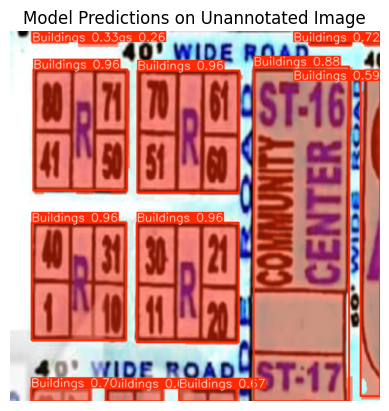

Predictions:
Label: 0.0, Confidence: 0.9637, Coordinates: [219.12254333496094, 331.7951965332031, 395.21392822265625, 538.3631591796875]
Label: 0.0, Confidence: 0.9587, Coordinates: [220.75497436523438, 68.30101776123047, 396.0240478515625, 279.4639587402344]
Label: 0.0, Confidence: 0.9574, Coordinates: [40.091304779052734, 66.32442474365234, 202.48101806640625, 275.12060546875]
Label: 0.0, Confidence: 0.9561, Coordinates: [37.57743835449219, 331.0665283203125, 200.31097412109375, 534.6419677734375]
Label: 0.0, Confidence: 0.8809, Coordinates: [421.08697509765625, 61.08308792114258, 586.44189453125, 640.0]
Label: 0.0, Confidence: 0.7170, Coordinates: [517.9725952148438, 0.0, 590.0181884765625, 23.658763885498047]
Label: 0.0, Confidence: 0.7046, Coordinates: [36.13655090332031, 617.002685546875, 137.83607482910156, 640.0]
Label: 0.0, Confidence: 0.6658, Coordinates: [292.02386474609375, 618.879150390625, 391.916748046875, 640.0]
Label: 0.0, Confidence: 0.6542, Coordinates: [165.18447875

In [8]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the trained model
model_path = "/kaggle/working/output_model/epoc2/weights/best.pt"  # Update with your trained model's path
model = YOLO(model_path)

# Path to the unannotated sample image
sample_image_path = "/kaggle/working/test/images/10_png.rf.98b2c265a471353913794cd75e549321.jpg"  # Update with the image you want to test

# Perform inference
results = model(sample_image_path)

# Access the first result in the list (the image you passed for testing)
result = results[0]

# Annotate the image with predictions
annotated_image_np = result.plot()  # Get the annotated image as a NumPy array

# Convert NumPy array to a PIL image
annotated_image = Image.fromarray(np.uint8(annotated_image_np))

# Save the annotated image to a file
output_dir = "/kaggle/working/inference_results"
os.makedirs(output_dir, exist_ok=True)  # Ensure the output directory exists
annotated_image_path = os.path.join(output_dir, "annotated_image.jpg")
annotated_image.save(annotated_image_path)

# Display the annotated image
plt.imshow(annotated_image)
plt.axis("off")
plt.title("Model Predictions on Unannotated Image")
plt.show()

# Print the predictions (bounding boxes, labels, confidence scores)
print("Predictions:")
for i in range(len(result.boxes)):
    # Access the class, confidence, and coordinates
    label = result.boxes.cls[i].item()  # Get the class index (e.g., 'Buildings')
    confidence = result.boxes.conf[i].item()  # Confidence score
    coordinates = result.boxes.xyxy[i].tolist()  # Bounding box coordinates [x1, y1, x2, y2]
    
    print(f"Label: {label}, Confidence: {confidence:.4f}, Coordinates: {coordinates}")



image 1/1 /kaggle/working/test/images/3_png.rf.a1f1191e70f861f96a3ae30506a36a70.jpg: 512x512 15 Buildingss, 16.4ms
Speed: 2.4ms preprocess, 16.4ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


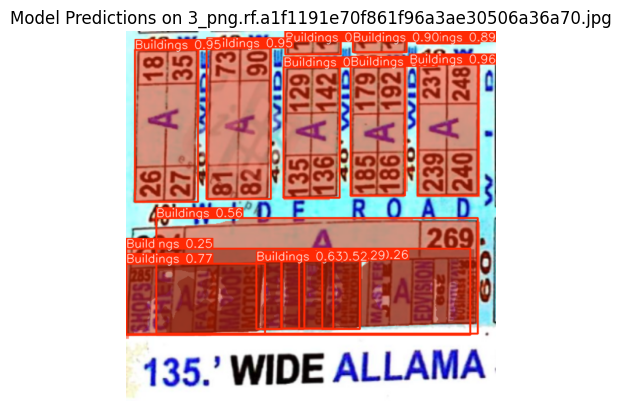

Predictions for 3_png.rf.a1f1191e70f861f96a3ae30506a36a70.jpg:
Label: 0.0, Confidence: 0.9649, Coordinates: [504.5546875, 57.627403259277344, 609.7124633789062, 284.01251220703125]
Label: 0.0, Confidence: 0.9557, Coordinates: [388.3943176269531, 61.546058654785156, 482.9725646972656, 284.8584289550781]
Label: 0.0, Confidence: 0.9509, Coordinates: [15.826778411865234, 32.56834030151367, 124.0816421508789, 295.7088928222656]
Label: 0.0, Confidence: 0.9493, Coordinates: [139.2628631591797, 29.45690155029297, 250.68618774414062, 290.7972412109375]
Label: 0.0, Confidence: 0.9397, Coordinates: [272.9393005371094, 62.871971130371094, 369.0083312988281, 288.8351745605469]
Label: 0.0, Confidence: 0.9010, Coordinates: [392.25860595703125, 0.0, 485.6614685058594, 36.79120635986328]
Label: 0.0, Confidence: 0.8882, Coordinates: [503.403076171875, 0.0, 611.4730834960938, 21.032419204711914]
Label: 0.0, Confidence: 0.8764, Coordinates: [275.4412536621094, 0.0, 371.870849609375, 40.037330627441406]
La

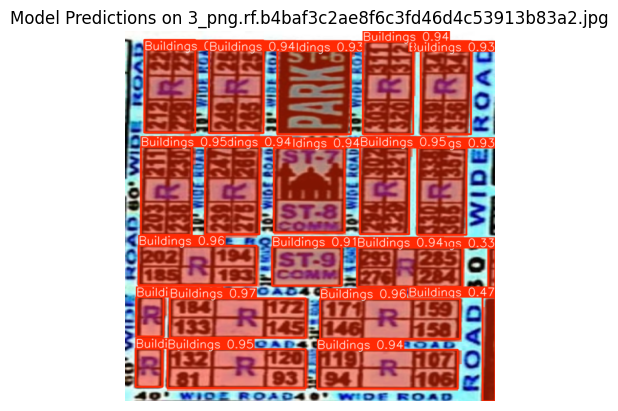

Predictions for 3_png.rf.b4baf3c2ae8f6c3fd46d4c53913b83a2.jpg:
Label: 0.0, Confidence: 0.9658, Coordinates: [77.71839904785156, 462.2208251953125, 312.9916076660156, 530.6664428710938]
Label: 0.0, Confidence: 0.9645, Coordinates: [337.3446044921875, 463.5703125, 579.4415283203125, 532.2066650390625]
Label: 0.0, Confidence: 0.9572, Coordinates: [23.703632354736328, 371.0505676269531, 227.19552612304688, 439.814453125]
Label: 0.0, Confidence: 0.9494, Coordinates: [73.7229232788086, 550.7605590820312, 312.75445556640625, 617.9559936523438]
Label: 0.0, Confidence: 0.9470, Coordinates: [406.3175048828125, 200.45242309570312, 491.19696044921875, 351.89691162109375]
Label: 0.0, Confidence: 0.9468, Coordinates: [27.1435546875, 200.87063598632812, 115.52735900878906, 352.140625]
Label: 0.0, Confidence: 0.9443, Coordinates: [145.69558715820312, 16.099281311035156, 239.79566955566406, 176.13868713378906]
Label: 0.0, Confidence: 0.9433, Coordinates: [138.78253173828125, 200.28179931640625, 232.874

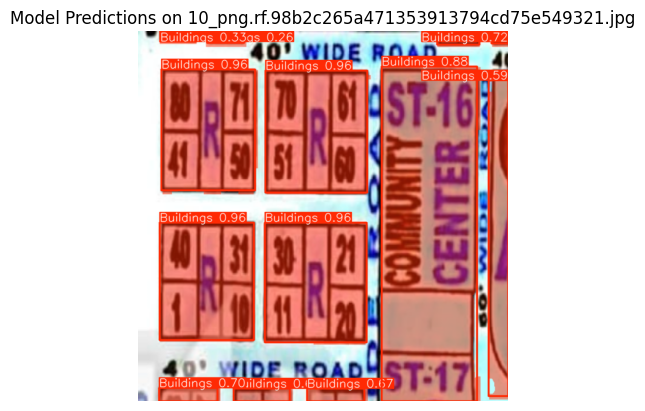

Predictions for 10_png.rf.98b2c265a471353913794cd75e549321.jpg:
Label: 0.0, Confidence: 0.9637, Coordinates: [219.12254333496094, 331.7951965332031, 395.21392822265625, 538.3631591796875]
Label: 0.0, Confidence: 0.9587, Coordinates: [220.75497436523438, 68.30101776123047, 396.0240478515625, 279.4639587402344]
Label: 0.0, Confidence: 0.9574, Coordinates: [40.091304779052734, 66.32442474365234, 202.48101806640625, 275.12060546875]
Label: 0.0, Confidence: 0.9561, Coordinates: [37.57743835449219, 331.0665283203125, 200.31097412109375, 534.6419677734375]
Label: 0.0, Confidence: 0.8809, Coordinates: [421.08697509765625, 61.08308792114258, 586.44189453125, 640.0]
Label: 0.0, Confidence: 0.7170, Coordinates: [517.9725952148438, 0.0, 590.0181884765625, 23.658763885498047]
Label: 0.0, Confidence: 0.7046, Coordinates: [36.13655090332031, 617.002685546875, 137.83607482910156, 640.0]
Label: 0.0, Confidence: 0.6658, Coordinates: [292.02386474609375, 618.879150390625, 391.916748046875, 640.0]
Label: 

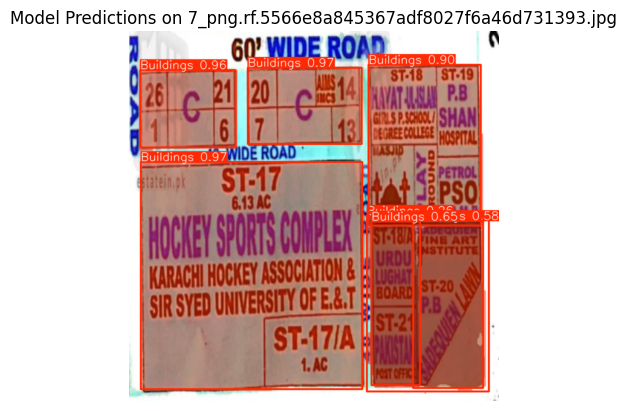

Predictions for 7_png.rf.5566e8a845367adf8027f6a46d731393.jpg:
Label: 0.0, Confidence: 0.9700, Coordinates: [205.9392547607422, 63.75075912475586, 402.19970703125, 195.05734252929688]
Label: 0.0, Confidence: 0.9655, Coordinates: [20.46215057373047, 226.24368286132812, 403.9068298339844, 619.9896850585938]
Label: 0.0, Confidence: 0.9626, Coordinates: [19.006900787353516, 67.64755249023438, 184.96742248535156, 201.39266967773438]
Label: 0.0, Confidence: 0.8999, Coordinates: [414.7288513183594, 58.293067932128906, 608.968017578125, 336.79864501953125]
Label: 0.0, Confidence: 0.6504, Coordinates: [419.18701171875, 329.68115234375, 503.13201904296875, 612.0596923828125]
Label: 0.0, Confidence: 0.5798, Coordinates: [491.37548828125, 328.4747314453125, 612.6773681640625, 617.3485107421875]
Label: 0.0, Confidence: 0.2552, Coordinates: [411.28082275390625, 319.0583801269531, 622.06591796875, 623.599609375]

image 1/1 /kaggle/working/test/images/8_png.rf.e958db8fc3c9d0d8681b8cd3aeb721b4.jpg: 512

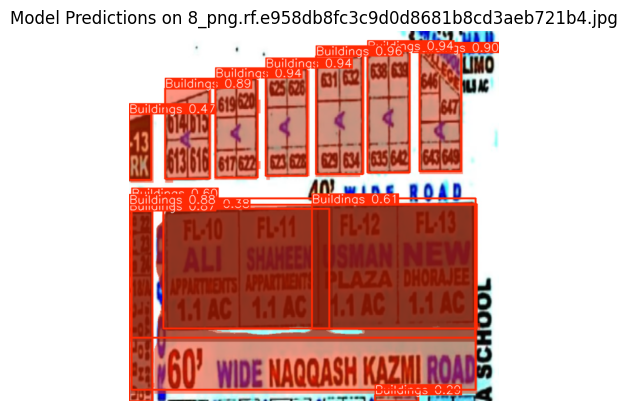

Predictions for 8_png.rf.e958db8fc3c9d0d8681b8cd3aeb721b4.jpg:
Label: 0.0, Confidence: 0.9557, Coordinates: [323.969482421875, 43.244476318359375, 404.97308349609375, 247.91256713867188]
Label: 0.0, Confidence: 0.9416, Coordinates: [236.85665893554688, 64.4912109375, 308.9429016113281, 250.10108947753906]
Label: 0.0, Confidence: 0.9415, Coordinates: [412.7117614746094, 34.553985595703125, 485.8688049316406, 244.98794555664062]
Label: 0.0, Confidence: 0.9384, Coordinates: [149.1449737548828, 81.88752746582031, 222.59341430664062, 253.16656494140625]
Label: 0.0, Confidence: 0.8979, Coordinates: [502.12213134765625, 37.72197723388672, 574.4824829101562, 242.63018798828125]
Label: 0.0, Confidence: 0.8937, Coordinates: [62.778900146484375, 99.84625244140625, 139.82943725585938, 255.03797912597656]
Label: 0.0, Confidence: 0.8824, Coordinates: [0.0, 300.3464050292969, 598.810302734375, 530.106689453125]
Label: 0.0, Confidence: 0.8721, Coordinates: [0.052547454833984375, 311.217041015625, 40.7

In [9]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the trained model
model_path = "/kaggle/working/output_model/epoc2/weights/best.pt"  # Update with your trained model's path
model = YOLO(model_path)

# Path to the directory containing your unannotated sample images
samples_dir = "/kaggle/working/test/images"  # Update with the correct directory path

# Create a directory to save the results
output_dir = "/kaggle/working/inference_results"
os.makedirs(output_dir, exist_ok=True)

# Iterate through all image files in the samples directory
for img_filename in os.listdir(samples_dir):
    # Check if the file is an image (you can extend this with more extensions if needed)
    if img_filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        sample_image_path = os.path.join(samples_dir, img_filename)
        
        # Perform inference on the image
        results = model(sample_image_path)

        # Access the first result (the image you passed for testing)
        result = results[0]

        # Annotate the image with predictions
        annotated_image_np = result.plot()  # Get the annotated image as a NumPy array

        # Convert NumPy array to a PIL image
        annotated_image = Image.fromarray(np.uint8(annotated_image_np))

        # Save the annotated image to a file
        annotated_image_path = os.path.join(output_dir, f"annotated_{img_filename}")
        annotated_image.save(annotated_image_path)

        # Display the annotated image
        plt.imshow(annotated_image)
        plt.axis("off")
        plt.title(f"Model Predictions on {img_filename}")
        plt.show()

        # Print the predictions (bounding boxes, labels, confidence scores)
        print(f"Predictions for {img_filename}:")
        for i in range(len(result.boxes)):
            # Access the class, confidence, and coordinates
            label = result.boxes.cls[i].item()  # Get the class index (e.g., 'Buildings')
            confidence = result.boxes.conf[i].item()  # Confidence score
            coordinates = result.boxes.xyxy[i].tolist()  # Bounding box coordinates [x1, y1, x2, y2]

            print(f"Label: {label}, Confidence: {confidence:.4f}, Coordinates: {coordinates}")
        print("="*50)  # Separator between results of different images


In [15]:
import os
from ultralytics import YOLO
from PIL import Image
import numpy as np
from pathlib import Path

# Load the trained model
model_path = "/kaggle/working/output_model/epoc2/weights/best.pt"  # Update with your trained model's path
model = YOLO(model_path)

# Directory containing the images to annotate
input_images_dir = "/kaggle/working/test/images"  # Update with your input image directory

# Create output directories for images and labels
images_output_dir = "/kaggle/working/annotated_results/images"
labels_output_dir = "/kaggle/working/annotated_results/labels"
os.makedirs(images_output_dir, exist_ok=True)
os.makedirs(labels_output_dir, exist_ok=True)

# Perform inference on all images in the input directory
for img_file in os.listdir(input_images_dir):
    img_path = os.path.join(input_images_dir, img_file)
    
    # Check if the file is an image (you can add more extensions if needed)
    if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        results = model(img_path)  # Perform inference
        result = results[0]  # Get the first result
        
        # Annotate the image
        annotated_image_np = result.plot()  # Get the annotated image as a NumPy array
        
        # Convert NumPy array to a PIL image
        annotated_image = Image.fromarray(np.uint8(annotated_image_np))
        
        # Save the annotated image in the specified output directory
        annotated_image_save_path = os.path.join(images_output_dir, f"annotated_{Path(img_file).stem}.jpg")
        annotated_image.save(annotated_image_save_path)

        # Save corresponding labels in a text file in the specified output directory
        label_save_path = os.path.join(labels_output_dir, f"{Path(img_file).stem}.txt")
        with open(label_save_path, 'w') as label_file:
            for i in range(len(result.boxes)):
                label = result.boxes.cls[i].item()  # Class index (label)
                confidence = result.boxes.conf[i].item()  # Confidence score
                coordinates = result.boxes.xyxy[i].tolist()  # Bounding box coordinates [x1, y1, x2, y2]
                
                # Write label information to the file (format: class_id confidence x1 y1 x2 y2)
                label_file.write(f"{label} {confidence:.4f} {' '.join(map(str, coordinates))}\n")

print("Annotated images and labels have been saved successfully!")



image 1/1 /kaggle/working/test/images/3_png.rf.a1f1191e70f861f96a3ae30506a36a70.jpg: 512x512 15 Buildingss, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /kaggle/working/test/images/3_png.rf.b4baf3c2ae8f6c3fd46d4c53913b83a2.jpg: 512x512 21 Buildingss, 16.3ms
Speed: 1.7ms preprocess, 16.3ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /kaggle/working/test/images/10_png.rf.98b2c265a471353913794cd75e549321.jpg: 512x512 13 Buildingss, 16.3ms
Speed: 1.7ms preprocess, 16.3ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /kaggle/working/test/images/7_png.rf.5566e8a845367adf8027f6a46d731393.jpg: 512x512 7 Buildingss, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 2.9ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /kaggle/working/test/images/8_png.rf.e958db8fc3c9d0d8681b8cd3aeb721b4.jpg: 512x512 13 Buildingss, 14.9ms
Speed: 1.6ms preprocess, 14.9ms 